#**Geospatial analyses using WaPOR data**
#Topic 3 - Notebook 5 : Plotting time series with pandas and matplotlib
In this notebook we will use the csv file produced in Notebook 4 and make a .   
The steps are:
1. Install and load necessary packages
2. Load the .csv file
3. Make plots with pandas
4. Make plots with matplotlib

### **Step 1**
>In this notebook we will use the <font color='steelblue'>**`matplotlib`**</font> and <font color='steelblue'>**`pandas`**</font> packages.    
These are pre-installed in colab so only loading is necessary.


In [1]:
import os
import glob
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

### **Step 2 - Upload and open the csv file with pandas, and manipulate the resulting dataframe**
We will now upload the .csv file to our session: decadal_AETI_timeseries_for_FakiMusa6_field.csv

In [2]:
#To upload file.
uploaded = files.upload()

Saving decadal_AETI_timeseries_for_FakiMusa6_field.csv to decadal_AETI_timeseries_for_FakiMusa6_field.csv


In [5]:
df = pd.read_csv('/content/decadal_AETI_timeseries_for_FakiMusa6_field.csv', index_col=0)

Inspect the dataframe (df) we have created from the .csv file.    

In [7]:
df.head()

,2201,2202,2203,2204,2205,2206,2207,2208,2209,2210,...,2217,2218,2219,2220,2221,2222,2223,2224,2225,2226
2023-01-21,61.004918,70.616393,67.2925,69.712500,62.033333,45.378873,63.241538,70.242857,66.482927,61.085484,...,71.162903,61.710,75.482,72.917778,65.141463,63.085,61.744262,47.064286,62.914634,74.555556
2022-10-01,16.803279,15.032787,14.8250,15.916667,16.878788,16.802817,14.123077,12.690476,14.048780,14.241935,...,15.177419,15.675,15.860,16.866667,17.268293,18.575,20.803279,18.880952,16.170732,15.222222
2022-12-11,17.377049,13.442623,12.9250,13.354167,12.272727,10.605634,10.615385,11.119048,11.097561,9.693548,...,13.516129,9.950,11.220,10.555556,9.243902,8.725,9.016393,9.785714,12.317073,13.355556
2023-02-21,46.360656,60.511475,54.1200,55.100000,54.327273,44.563380,56.947692,61.676190,60.585366,59.625806,...,56.180645,54.720,63.408,63.893333,65.190244,64.780,60.655738,44.933333,52.682927,61.902222
2022-11-11,8.967213,6.622951,6.5000,6.937500,7.575758,7.830986,7.738462,7.238095,7.243902,7.403226,...,6.612903,6.975,6.840,7.400000,7.658537,7.500,8.442623,9.500000,9.097561,7.977778


We can see the *index* is the dekad - we obtained this by setting *index_col=0* while reading the .csv file - and each column corresponds to a different field.    
To obtain the time-series for one field we can simply call the column. For example for field number 2203 we can run the following cell:

In [8]:
df['2202']

2023-01-21    70.616393
2022-10-01    15.032787
2022-12-11    13.442623
2023-02-21    60.511475
2022-11-11     6.622951
2022-10-21     9.611475
2022-10-11    12.180328
2023-04-11     9.836066
2022-11-21     7.622951
2023-04-21     7.901639
2023-01-01    34.131148
2023-02-01    72.901639
2023-03-11    56.672131
2023-02-11    73.606557
2023-03-21    40.339344
2023-04-01    18.327869
2022-12-01     8.000000
2023-03-01    68.704918
2023-01-11    49.409836
2022-11-01     7.721311
2022-12-21    22.000000
Name: 2202, dtype: float64

### **Step 3 - Plotting with pandas**

There are multiple ways of many plots - one is to use the inbuilt function from pandas (which uses matplotlib in the backend by default), and another is to use matplotlib directly. We will briefly look into both of these.    
       
To start, let us use the .plot() function you have seen in the previous notebook. We can plot all of the series at once (as done previously) or select one column to plot.

<Axes: >

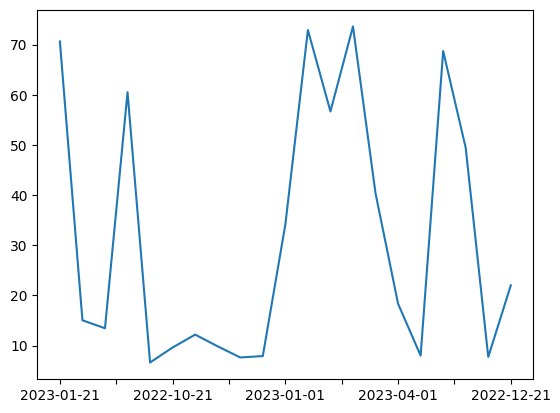

In [10]:
df['2202'].plot()

Here we can see the default plot for this type of data.  
A number of elements are missing, for example a title, axis labels and units...   These elements can be added/changed by adding arguments to the .plot() call.

*   The axis labels *ylabel*
*   The plot title with *title*
*   The line style
*   The figure size with *figsize *   
    
You can find a reference for the different options [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

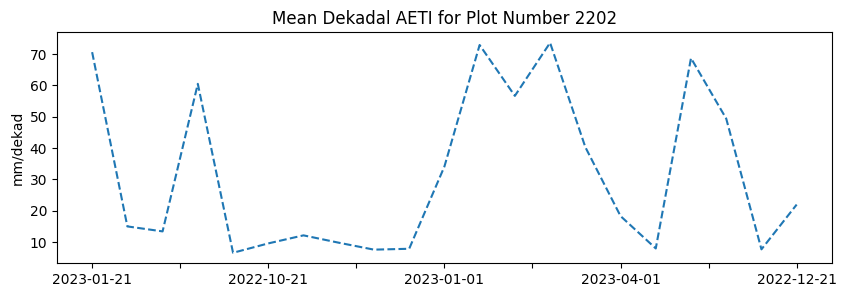

In [25]:
df['2202'].plot(ylabel='mm/dekad', title='Mean Dekadal AETI for Plot Number 2202', figsize=(10,3), style='--');

You may also want to produce scatter plots, or xy plots to compare how the ET of two plots compares. You can do this by changing the style of your plot and defining the x and y variables as shown below.

<Axes: xlabel='2202'>

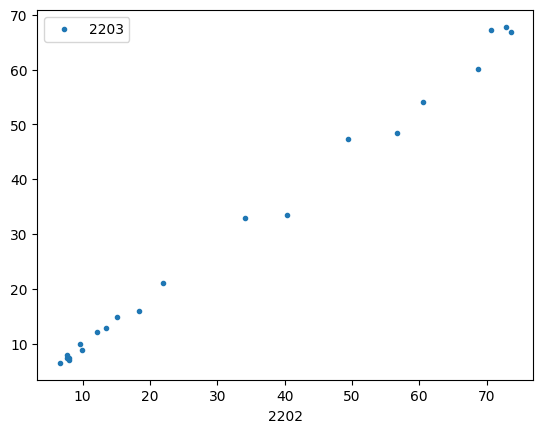

In [24]:
df.plot(x='2202', y='2203', style='.')

### **Step 3 - Plotting with matplotlib**

This .plot() call will only work on a dataframe, so if you have data in arrays or lists or if you want to make certain kinds of plots and have better control over your figure you may need to use matplotlib instead.     
To make a similar plot to that of the scatter above, we can use the scatter function from matplotlib.pyplot (imported as plt in cell 1):

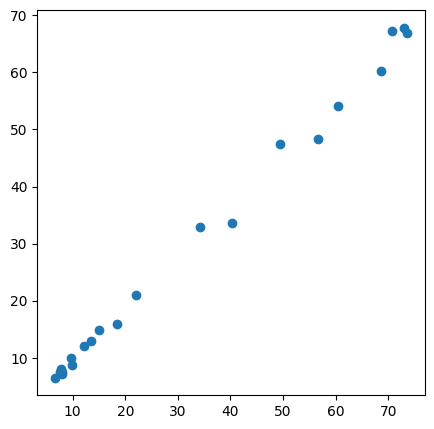

In [33]:
plt.figure(figsize=[5, 5])
plt.scatter(df['2202'],df['2203']);

For such a plot it makes sense for the x and y limits to be harmonizes, to add a grid and to add the 1:1 line, as well as our standards, the labels and a title.
To do these things, it can be helpful to have a direct way to interact with the axes, for this we will start with defining a figure and axes

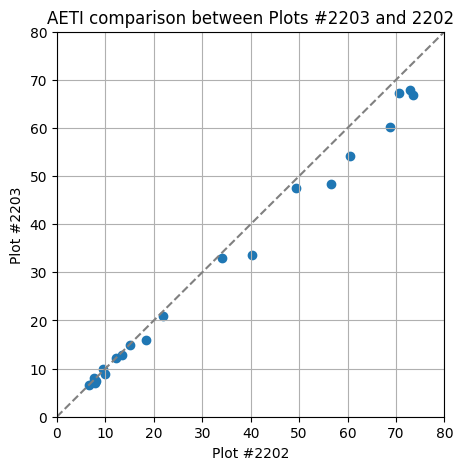

In [49]:
fig, ax = plt.subplots(figsize=[5, 5])

ax.set_ylim([0,80]);
ax.set_xlim([0,80]);
ax.grid(True)

ax.plot([0,80],[0,80],color='grey', linestyle='--')
ax.scatter(df['2202'],df['2203']);

ax.set_ylabel('Plot #2203')
ax.set_xlabel('Plot #2202')

plt.title('AETI comparison between Plots #2203 and 2202');